In [32]:
test = "Hello World"
print("test:", test)
# Expected output: test: Hello World

test: Hello World


In [38]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# sigmoid function

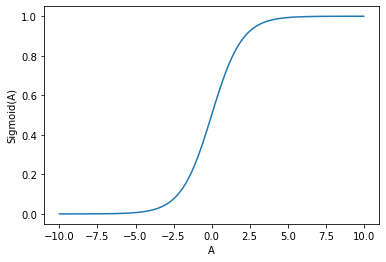

In [41]:
a = np.linspace(-10,10,100)
b = 1/(1+np.exp(-a))

plt.plot(a, b)
plt.xlabel("A")
plt.ylabel("Sigmoid(A)");

In [42]:
# GRADED FUNCTION: basic_sigmoid

import math

def basic_sigmoid(x):
    
    s = 1/(1+math.exp(-x))
    
    return s

In [43]:
basic_sigmoid(4.2)
# Expected output: 0.9852259683067269

0.9852259683067269

### One reason why we use "numpy" instead of "math" in Deep Learning is that we work on Matrix and Vector but math works on real numbers

In [44]:
x = np.array([1, 2, 3])
basic_sigmoid(x)

TypeError: only size-1 arrays can be converted to Python scalars

In [45]:
# example of np.exp
x = np.array([1, 2, 3])
print(np.exp(x))

[ 2.71828183  7.3890561  20.08553692]


In [46]:
# example of vector operation
x = np.array([1, 2, 3])
print (x + 3)

[4 5 6]


$$ \text{For } x \in \mathbb{R}^n \text{,     } sigmoid(x) = sigmoid\begin{pmatrix}
    x_1  \\
    x_2  \\
    ...  \\
    x_n  \\
\end{pmatrix} = \begin{pmatrix}
    \frac{1}{1+e^{-x_1}}  \\
    \frac{1}{1+e^{-x_2}}  \\
    ...  \\
    \frac{1}{1+e^{-x_n}}  \\
\end{pmatrix}\tag{1} $$

In [47]:
def sigmoid(x):
    """
    Compute the sigmoid of x
    Arguments:
    x -- A scalar or numpy array of any size
    Return:
    s -- sigmoid(x)
    """

    s = 1/(1+np.exp(-x))
    
    return s

In [48]:
x = np.array([1, 2, 3])
sigmoid(x)
# Expected output: array([0.73105858, 0.88079708, 0.95257413])

array([0.73105858, 0.88079708, 0.95257413])

### Sigmoid gradient

You will need to compute gradients to optimize loss functions using backpropagation. 

**Exercise**: The function sigmoid_grad() compute the gradient of the sigmoid function with respect to its input x. The formula is: $$sigmoid\_derivative(x) = \sigma'(x) = \sigma(x) (1 - \sigma(x))\tag{2}$$
You often code this function in two steps:
1. Set s to be the sigmoid of x. You might find your sigmoid(x) function useful.
2. Compute $\sigma'(x) = s(1-s)$

In [49]:
# GRADED FUNCTION: sigmoid_derivative

def sigmoid_derivative(x):
    """
    Arguments: x  --> A scalar or numpy array
    Return:    ds --> Your computed gradient.
    """
    
    s = 1/(1+np.exp(-x))
    ds = s*(1-s)
    
    return ds

In [50]:
x = np.array([1, 2, 3])
print (sigmoid_derivative(x))
# Expected output: [0.19661193 0.10499359 0.04517666]

[0.19661193 0.10499359 0.04517666]


### Reshaping arrays

In [51]:
def image2vector(image):
    """
    Argument: image -- a numpy array of shape (length, height, depth)
    Returns:  v -- a vector of shape (length*height*depth, 1)
    """
    
    v = image.reshape(3*3*2,1)

    return v

In [52]:
image = np.array([[[ 0.67826139,  0.29380381],
                   [ 0.90714982,  0.52835647],
                   [ 0.4215251 ,  0.45017551]],
                  [[ 0.92814219,  0.96677647],
                   [ 0.85304703,  0.52351845],
                   [ 0.19981397,  0.27417313]],
                  [[ 0.60659855,  0.00533165],
                   [ 0.10820313,  0.49978937],
                   [ 0.34144279,  0.94630077]]])

print(image2vector(image))

[[0.67826139]
 [0.29380381]
 [0.90714982]
 [0.52835647]
 [0.4215251 ]
 [0.45017551]
 [0.92814219]
 [0.96677647]
 [0.85304703]
 [0.52351845]
 [0.19981397]
 [0.27417313]
 [0.60659855]
 [0.00533165]
 [0.10820313]
 [0.49978937]
 [0.34144279]
 [0.94630077]]


### Normalizing rows

Another common technique we use in Machine Learning and Deep Learning is to normalize our data. It often leads to a better performance because gradient descent converges faster after normalization. Here, by normalization we mean changing x to $ \frac{x}{\| x\|} $ (dividing each row vector of x by its norm).

For example, if $$x = 
\begin{bmatrix}
    0 & 3 & 4 \\
    2 & 6 & 4 \\
\end{bmatrix}\tag{3}$$ then $$\| x\| = np.linalg.norm(x, axis = 1, keepdims = True) = \begin{bmatrix}
    5 \\
    \sqrt{56} \\
\end{bmatrix}\tag{4} $$and        $$ x\_normalized = \frac{x}{\| x\|} = \begin{bmatrix}
    0 & \frac{3}{5} & \frac{4}{5} \\
    \frac{2}{\sqrt{56}} & \frac{6}{\sqrt{56}} & \frac{4}{\sqrt{56}} \\
\end{bmatrix}\tag{5}$$ 

In [53]:
def normalizeRows(x):
    """
    Argument:     x -- A numpy matrix of shape (n, m)
    Returns:      x -- The normalized (by row) numpy matrix. You are allowed to modify x.
    """
    
    # Compute x_norm as the norm 2 of x. Use np.linalg.norm(..., ord = 2, axis = ..., keepdims = True)
    x_norm = np.linalg.norm(x,axis=1,keepdims=True)
    
    # Divide x by its norm.
    x = x/x_norm

    return x

In [55]:
x = np.array([
    [0, 3, 4],
    [1, 6, 4]])
print(normalizeRows(x))
# Expected output: [[0.         0.6        0.8       ]
#                   [0.13736056 0.82416338 0.54944226]]

[[0.         0.6        0.8       ]
 [0.13736056 0.82416338 0.54944226]]


### Broadcasting and the softmax function
**Exercise**: Implement a softmax function using numpy. You can think of softmax as a normalizing function used when your algorithm needs to classify two or more classes.

**Instructions**:
- $ \text{for } x \in \mathbb{R}^{1\times n} \text{,     } softmax(x) = softmax(\begin{bmatrix}
    x_1  &&
    x_2 &&
    ...  &&
    x_n  
\end{bmatrix}) = \begin{bmatrix}
     \frac{e^{x_1}}{\sum_{j}e^{x_j}}  &&
    \frac{e^{x_2}}{\sum_{j}e^{x_j}}  &&
    ...  &&
    \frac{e^{x_n}}{\sum_{j}e^{x_j}} 
\end{bmatrix} $ 

- $\text{for a matrix } x \in \mathbb{R}^{m \times n} \text{,  $x_{ij}$ maps to the element in the $i^{th}$ row and $j^{th}$ column of $x$, thus we have: }$  $$softmax(x) = softmax\begin{bmatrix}
    x_{11} & x_{12} & x_{13} & \dots  & x_{1n} \\
    x_{21} & x_{22} & x_{23} & \dots  & x_{2n} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    x_{m1} & x_{m2} & x_{m3} & \dots  & x_{mn}
\end{bmatrix} = \begin{bmatrix}
    \frac{e^{x_{11}}}{\sum_{j}e^{x_{1j}}} & \frac{e^{x_{12}}}{\sum_{j}e^{x_{1j}}} & \frac{e^{x_{13}}}{\sum_{j}e^{x_{1j}}} & \dots  & \frac{e^{x_{1n}}}{\sum_{j}e^{x_{1j}}} \\
    \frac{e^{x_{21}}}{\sum_{j}e^{x_{2j}}} & \frac{e^{x_{22}}}{\sum_{j}e^{x_{2j}}} & \frac{e^{x_{23}}}{\sum_{j}e^{x_{2j}}} & \dots  & \frac{e^{x_{2n}}}{\sum_{j}e^{x_{2j}}} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    \frac{e^{x_{m1}}}{\sum_{j}e^{x_{mj}}} & \frac{e^{x_{m2}}}{\sum_{j}e^{x_{mj}}} & \frac{e^{x_{m3}}}{\sum_{j}e^{x_{mj}}} & \dots  & \frac{e^{x_{mn}}}{\sum_{j}e^{x_{mj}}}
\end{bmatrix} = \begin{pmatrix}
    softmax\text{(first row of x)}  \\
    softmax\text{(second row of x)} \\
    ...  \\
    softmax\text{(last row of x)} \\
\end{pmatrix} $$

In [56]:
# GRADED FUNCTION: softmax

def softmax(x):
    """Calculates the softmax for each row of the input x.

    The code works for a row vector and also for matrices of shape (n, m).
    """
    
    max = np.max(x,axis=1,keepdims=True)    #returns max of each row and keeps same dims
    e_x = np.exp(x - max)                   #subtracts each row with its max value
    sum = np.sum(e_x,axis=1,keepdims=True)  #returns sum of each row and keeps same dims
    s = e_x / sum
    
    return s

In [57]:
x = np.array([[9, 2, 5, 0, 0],
              [7, 5, 0, 0 ,0]])
print(softmax(x))
# Expected output: [[9.80897665e-01 8.94462891e-04 1.79657674e-02 1.21052389e-04 1.21052389e-04]
#                   [8.78679856e-01 1.18916387e-01 8.01252314e-04 8.01252314e-04 8.01252314e-04]]

[[9.80897665e-01 8.94462891e-04 1.79657674e-02 1.21052389e-04
  1.21052389e-04]
 [8.78679856e-01 1.18916387e-01 8.01252314e-04 8.01252314e-04
  8.01252314e-04]]


In [58]:
a = np.max(x,axis=1,keepdims=True)
a

array([[9],
       [7]])

In [59]:
b = x - a
b

array([[ 0, -7, -4, -9, -9],
       [ 0, -2, -7, -7, -7]])

In [60]:
c = np.exp(b)
c

array([[1.00000000e+00, 9.11881966e-04, 1.83156389e-02, 1.23409804e-04,
        1.23409804e-04],
       [1.00000000e+00, 1.35335283e-01, 9.11881966e-04, 9.11881966e-04,
        9.11881966e-04]])

In [61]:
print(x)
print(x.sum(axis=1,keepdims=True))
print(x/x.sum(axis=1,keepdims=True))

[[9 2 5 0 0]
 [7 5 0 0 0]]
[[16]
 [12]]
[[0.5625     0.125      0.3125     0.         0.        ]
 [0.58333333 0.41666667 0.         0.         0.        ]]


## 2 - Vectorization

To make sure that your code is  computationally efficient, you will use vectorization. 

In [65]:
import time
import numpy as np

x1 = np.random.rand(1024)
x2 = np.random.rand(1024)
W = np.random.rand(4096, len(x1))

### CLASSIC DOT PRODUCT OF VECTORS IMPLEMENTATION ###
tic = time.process_time()
dot = 0
for i in range(len(x1)):
    dot+= x1[i]*x2[i]
toc = time.process_time()
print('"{}" computation time = {} ms'.format('dot product', (toc - tic)*1e3))

### CLASSIC OUTER PRODUCT IMPLEMENTATION ###
tic = time.process_time()
outer = np.zeros((len(x1),len(x2))) # we create a len(x1)*len(x2) matrix with only zeros
for i in range(len(x1)):
    for j in range(len(x2)):
        outer[i,j] = x1[i]*x2[j]
toc = time.process_time()
print('"{}" computation time = {} ms'.format('outer product', (toc - tic)*1e3))

### CLASSIC ELEMENTWISE IMPLEMENTATION ###
tic = time.process_time()
mul = np.zeros(len(x1))
for i in range(len(x1)):
    mul[i] = x1[i]*x2[i]
toc = time.process_time()
print('"{}" computation time = {} ms'.format('elementwise multiplication', (toc - tic)*1e3))

### CLASSIC GENERAL DOT PRODUCT IMPLEMENTATION ###
tic = time.process_time()
gdot = np.zeros(W.shape[0])
for i in range(W.shape[0]):
    for j in range(len(x1)):
        gdot[i] += W[i,j]*x1[j]
toc = time.process_time()
print('"{}" computation time = {} ms'.format('(general) dot product', (toc - tic)*1e3))

"dot product" computation time = 0.0 ms
"outer product" computation time = 890.625 ms
"elementwise multiplication" computation time = 0.0 ms
"(general) dot product" computation time = 4359.375 ms


In [66]:
### VECTORIZED DOT PRODUCT OF VECTORS ###
tic = time.process_time()
dot = np.dot(x1,x2)
toc = time.process_time()
print('"{}" computation time = {} ms'.format('dot product', (toc - tic)*1e3))

### VECTORIZED OUTER PRODUCT ###
tic = time.process_time()
outer = np.outer(x1,x2)
toc = time.process_time()
print('"{}" computation time = {} ms'.format('outer product', (toc - tic)*1e3))

### VECTORIZED ELEMENTWISE MULTIPLICATION ###
tic = time.process_time()
mul = np.multiply(x1,x2)
toc = time.process_time()
print('"{}" computation time = {} ms'.format('elementwise multiplication', (toc - tic)*1e3))

### VECTORIZED GENERAL DOT PRODUCT ###
tic = time.process_time()
dot = np.dot(W,x1)
toc = time.process_time()
print('"{}" computation time = {} ms'.format('(general) dot product', (toc - tic)*1e3))

"dot product" computation time = 0.0 ms
"outer product" computation time = 15.625 ms
"elementwise multiplication" computation time = 0.0 ms
"(general) dot product" computation time = 46.875 ms


### Implement the L1 and L2 loss functions

The loss is used to evaluate the performance of your model. The bigger your loss is, the more different your predictions ($ \hat{y} $) are from the true values ($y$). In deep learning, you use optimization algorithms like Gradient Descent to train your model and to minimize the cost.
- L1 loss is defined as:
$$\begin{align*} & L_1(\hat{y}, y) = \sum_{i=0}^m|y^{(i)} - \hat{y}^{(i)}| \end{align*}\tag{6}$$

In [67]:
# GRADED FUNCTION: L1

def L1(yhat, y):
    
    loss = np.sum(np.abs(yhat-y))
    
    return loss

In [68]:
yhat = np.array([.9, 0.2, 0.1, .4, .9])
y = np.array([1, 0, 0, 1, 1])
print( L1(yhat, y) )
# Expected output: 1.1

1.1


Implement the numpy vectorized version of the L2 loss. There are several way of implementing the L2 loss but you may find the function np.dot() useful. As a reminder, if $x = [x_1, x_2, ..., x_n]$, then `np.dot(x,x)` = $\sum_{j=0}^n x_j^{2}$. 

- L2 loss is defined as $$\begin{align*} & L_2(\hat{y},y) = \sum_{i=0}^m(y^{(i)} - \hat{y}^{(i)})^2 \end{align*}\tag{7}$$

In [69]:
# GRADED FUNCTION: L2

def L2(yhat, y):
    
    x = yhat-y
    loss = np.sum(np.dot(x,x))# TODO (≈ 1 LOC)
    
    return loss

In [70]:
yhat = np.array([.9, 0.2, 0.1, .4, .9])
y = np.array([1, 0, 0, 1, 1])
print( L2(yhat,y) )
# Expected output: 0.43

0.43
